PRA PEMROSESAN DATA

1. Tentukan Library yang digunakan

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

2. Load Dataset

In [310]:
datasets = pd.read_excel('dataKasus-1.xlsx')
datasets

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
557,559,NAMA 558,28 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
558,560,NAMA 559,41 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
559,561,NAMA 560,32 TH,2,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


Coba menampilkan 5 baris data

In [311]:
datasets.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


menghitung jumlah baris,coloumn (561,13)

In [312]:
datasets.shape

(561, 13)

menghitung nilai yang ada di atribut PE/Non PE

In [313]:
datasets['PE/Non PE'].value_counts()

PE/Non PE
Non PE                    520
PEB                        20
PE                         17
Eklamsia                    1
PE gemelli                  1
PEB impending eklampsi      1
PE                          1
Name: count, dtype: int64

menghilangkan coloumn unnamed

In [314]:
datasets = datasets.drop(columns=['Unnamed: 12'])

menghilangkan whitespace dari masing masing kolom

dan memanggil list dari dataset yang tersedia beserta deskripsi, size dann informasi lain

In [315]:
datasets.columns = datasets.columns.str.strip()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

memperlihatkan data yang ada value null atau kosong

In [316]:
print(datasets.isnull().sum())

NO                                  0
NAMA                                0
USIA                                3
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


convert semua value di kolom USIA ke string dan menghitung jumlah value di USIA termasuk NaN

In [317]:
# Mengubah data menjadi string dan menghitung nilai unik
value_counts = datasets['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
28 TH     28
25 TH     24
31 TH     23
29 TH     22
24 TH     21
          ..
30 th      1
23         1
37         1
39 TH      1
14 TH      1
Name: count, Length: 73, dtype: int64


Mengisi nilai NaN dengan string kosong

In [318]:
datasets['USIA'] = datasets['USIA'].fillna('')

cek tipe dataset usia

In [319]:
print(datasets['USIA'].dtype)

object


mengubah tipe data usia dari float ke object

In [320]:
# Menghapus spasi ekstra dan mengambil angka


# Mengonversi ke tipe data numerik
datasets['USIA'] = pd.to_numeric(datasets['USIA'], errors='coerce')

# Mengisi nilai NaN dengan rata-rata usia
datasets['USIA'] = datasets['USIA'].fillna(datasets['USIA'].mean())

cek kembali tipe dataset usia

In [321]:
print(datasets['USIA'].dtype)

float64


Mengonversi ke tipe data numerik

In [322]:
datasets['USIA'] = pd.to_numeric(datasets['USIA'], errors='coerce')

mengubah tipe data dari object ke int

In [323]:
print(datasets['USIA'].dtype)

float64


Mengisi nilai NaN dengan rata-rata usia

In [324]:
datasets['USIA'] = datasets['USIA'].fillna(datasets['USIA'].mean())

menampilkan dataset USIA dan tipe data sudah menjadi int

In [325]:
print(datasets['USIA'])

0      26.090909
1      26.090909
2      26.090909
3      26.090909
4      26.090909
         ...    
556    26.090909
557    26.090909
558    26.090909
559    26.090909
560    26.090909
Name: USIA, Length: 561, dtype: float64


Mengubah data menjadi string dan menghitung nilai unik

In [326]:
value_counts = datasets['USIA'].astype(str).value_counts(dropna=False)

mendefinisikan USIA mejadi value_counts dan menampilkan jumlah data

In [327]:
print(value_counts)

USIA
26.09090909090909    550
26.0                   4
29.0                   2
16.0                   1
28.0                   1
23.0                   1
37.0                   1
21.0                   1
Name: count, dtype: int64


mendefinisikan PARITAS menjadi value_count dan memunculkan jumlah nilai termasuk NaN

In [328]:
value_counts = datasets['PARITAS'].astype(str).value_counts(dropna=False)
print(value_counts)

PARITAS
1    228
2    186
3     82
0     39
4     20
5      3
6      3
Name: count, dtype: int64


Mendefinisikan JARAK KELAHIRAN menjadi value_count dan mengubah data menjadi string dan menghitung nilai unik serta memunculkan jumlah value unik

In [329]:
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    260
> 2 tahun       211
< 2 tahun        81
nan               7
> 2 tahun         2
Name: count, dtype: int64


Mengisi nilai NaN dengan string kosong

In [330]:
datasets['USIA'] = datasets['USIA'].fillna('')

Menghapus spasi ekstra dan mengambil angka

In [331]:
datasets['USIA'] = datasets['USIA'].astype(str).str.strip().str.extract('(\d+)')[0]

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_24772\1929621190.py:1: SyntaxWarning: invalid escape sequence '\d'
  datasets['USIA'] = datasets['USIA'].astype(str).str.strip().str.extract('(\d+)')[0]


Mengonversi ke tipe data numerik

In [332]:
datasets['USIA'] = pd.to_numeric(datasets['USIA'], errors='coerce')

Mengisi nilai NaN dengan rata-rata usia

In [333]:
datasets['USIA'] = datasets['USIA'].fillna(datasets['USIA'].mean())

simpleimputer adalah class yang digunakan untuk menggantikan value kosong di dataset, menggunakan most_frequent dimana mengganti value yang hilang dengan value yang paling sering muncul di dataset

label encoder adalah class yang digunakan  untuk  mengubah  data  yang  tidak  dapat  diakses  secara langsung menjadi data yang dapat  diakses secara langsung. 

In [334]:
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder

mengambil kolom "JARAK KELAHIRAN" dari dataset, menerapkan imputer untuk mengisi nilai yang hilang, dan kemudian mengubah array yang dihasilkan menjadi array 1-dimensi. Nilai yang diisi kemudian ditugaskan kembali ke kolom asli dalam dataset.

In [335]:
datasets['JARAK KELAHIRAN'] = imputer.fit_transform(datasets[['JARAK KELAHIRAN']]).ravel()

Mengganti nilai '> 2 tahun ' dengan '> 2 tahun'

In [336]:
datasets['JARAK KELAHIRAN'] = datasets['JARAK KELAHIRAN'].replace('> 2 tahun ', '> 2 tahun')

Mengubah data menjadi string dan menghitung nilai unik

In [337]:
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

In [338]:
print(value_counts)

JARAK KELAHIRAN
anak pertama    267
> 2 tahun       213
< 2 tahun        81
Name: count, dtype: int64


Mengubah data menjadi string dan menghitung nilai unik

In [339]:
value_counts = datasets['RIW HIPERTENSI'].astype(str).value_counts(dropna=False)

In [340]:
print(value_counts)

RIW HIPERTENSI
Tidak    508
Ya        53
Name: count, dtype: int64


Mendefinisikan RIW PE menjadi value_counts dan mengubah data menjadi string dan menghitung nilai unik

In [341]:
value_counts = datasets['RIW PE'].astype(str).value_counts(dropna=False)

In [342]:
print(value_counts)

RIW PE
Tidak                     526
PEB                        19
PE                          6
HELLP SYNDROM               2
Impending PE                2
Impending Eklamsia          1
Kejang Konvulsi             1
impending eklamsia          1
PE, HELLP Syndrome          1
PEB impending eklampsi      1
Impending Ekalmsia          1
Name: count, dtype: int64


menggantikan nilai-nilai tertentu dalam kolom "RIW PE" selain Tidak dengan nilai "Ada". Nilai-nilai yang digantikan adalah nama-nama kondisi medis yang terkait dengan preeklamsia. Setelah penggantian, kolom "RIW PE" akan berisi nilai "Ada"

In [343]:
datasets['RIW PE'] = datasets['RIW PE'].replace(
    to_replace=['PEB', 'PE', 'HELLP SYNDROM', 'Impending PE', 'Impending Eklamsia', 'PE, HELLP Syndrome', 'PEB impending eklampsi', 'Impending Ekalmsia', 'Kejang Konvulsi', 'impending eklamsia'],
    value='Ada'
)

setelah diubah Mengubah data menjadi string dan menghitung nilai unik dan memunculkan kembali data RIW PE setelah diubah 

In [344]:
value_counts = datasets['RIW PE'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW PE
Tidak    526
Ada       35
Name: count, dtype: int64


Mendefinisi OBESITAS menjadi value count dan menubah data menjadi string dan menghitung nilai unik dan dimunculkan jumlah datanya, karena sudah menjadi ya dan tidak . tidak perlu dirubah kembali

In [345]:
value_counts = datasets['OBESITAS'].astype(str).value_counts(dropna=False)

print(value_counts)

OBESITAS
Tidak    556
Ya         5
Name: count, dtype: int64


Mendefinisi RIW DM menjadi value count dan menubah data menjadi string dan menghitung nilai unik dan dimunculkan jumlah datanya, karena sudah menjadi ya dan tidak . tidak perlu dirubah kembali

In [346]:
value_counts = datasets['RIW DM'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW DM
Tidak    556
Ya         5
Name: count, dtype: int64


Mendefinisi RIW HIPERTENSI/PE DALAM KELUARGA menjadi value count dan menubah data menjadi string dan menghitung nilai unik dan dimunculkan jumlah datanya, karena sudah menjadi ya dan tidak . tidak perlu dirubah kembali

In [347]:
value_counts = datasets['RIW HIPERTENSI/PE DALAM KELUARGA'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW HIPERTENSI/PE DALAM KELUARGA
Tidak    550
Ada       11
Name: count, dtype: int64


Mendefinisi SOSEK RENDAH menjadi value count dan menubah data menjadi string dan menghitung nilai unik dan dimunculkan jumlah datanya, karena sudah menjadi 2 tipe >UMR dan < UMR . tidak perlu dirubah kembali

In [348]:
value_counts = datasets['SOSEK RENDAH'].astype(str).value_counts(dropna=False)

print(value_counts)

SOSEK RENDAH
>UMR    557
<UMR      4
Name: count, dtype: int64


Mendefinisi PE/Non PE menjadi value count dan menubah data menjadi string dan menghitung nilai unik dan dimunculkan jumlah datanya, untuk cek value apa saja yang ada dalam PE/Non PE

In [349]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE                    520
PEB                        20
PE                         17
Eklamsia                    1
PE gemelli                  1
PEB impending eklampsi      1
PE                          1
Name: count, dtype: int64


karena Non PE dan selain Non PE masih banyak tipe, maka harus mengkategorikan Non PE atau PE sesuai nama atribut

In [350]:
datasets['PE/Non PE'] = datasets['PE/Non PE'].replace(
    to_replace=['PEB', 'PE', 'Eklamsia', 'PE gemelli', 'PEB impending eklampsi', 'PE '],
    value='PE'
)

memunculkan kembali dataset PE/Non PE

In [351]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE    520
PE         41
Name: count, dtype: int64


membuat a bar chart di dataset PE/Non PE yang sudah dikonversi

In [352]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = datasets['PE/Non PE'].value_counts()

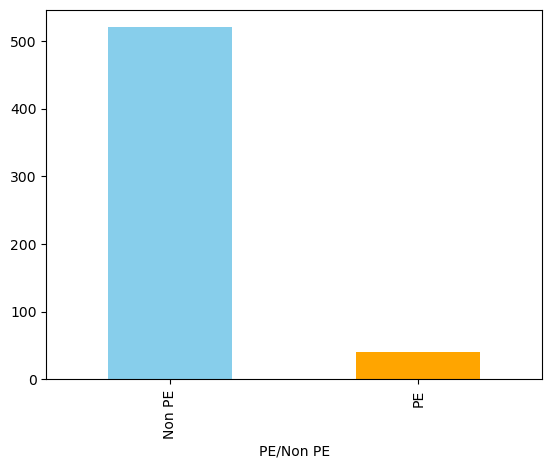

In [216]:
ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])

menambahkan title dan label

Text(0, 0.5, 'Count')

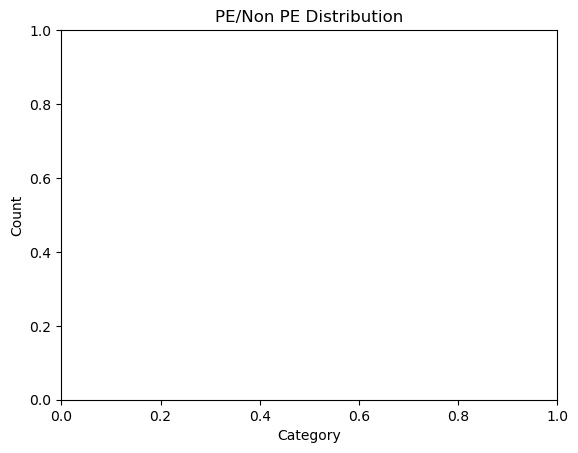

In [217]:
plt.title('PE/Non PE Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

menambahkan jumlahnya label di atas tiap bar

In [218]:
for i, count in enumerate(value_counts):
    ax.text(i, count , str(count), ha='center', va='bottom')

Display the bar chart

In [219]:
plt.show()

script memunculkan label PE/Non PE dengan menambahkan label diatas dan memunculkan jumlah diatas tiap label

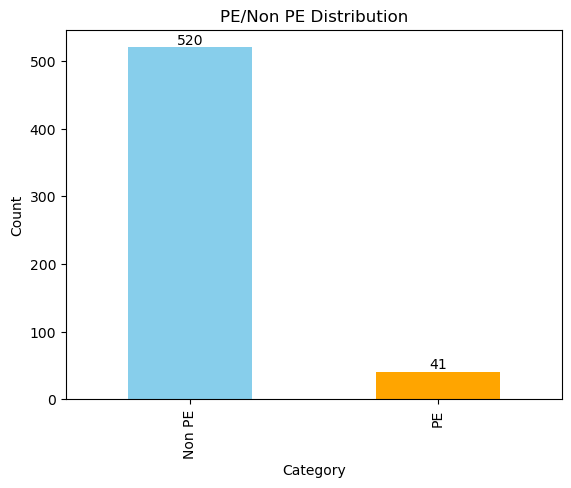

In [353]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = datasets['PE/Non PE'].value_counts()
ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])

plt.title('PE/Non PE Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

for i, count in enumerate(value_counts):
    ax.text(i, count , str(count), ha='center', va='bottom')

plt.show()

menampilkan info dataset

In [355]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              561 non-null    int64 
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   561 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(3), object(9)

In [356]:
label_encoder = LabelEncoder()
datasets['JARAK KELAHIRAN'] = label_encoder.fit_transform(datasets['JARAK KELAHIRAN'])

In [357]:
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
2    267
1    213
0     81
Name: count, dtype: int64


dicek PARITAS belum di cleaning maka dicek data apa saja yang ada dalam PARITAS

karena JARAK KELAHIRAN sudah berupa kategorikal maka menggunakan package OneHot untuk mengubah kategorikal  menjadi numerikal

In [358]:
from sklearn.preprocessing import OneHotEncoder

Inisialisasi OneHotEncoder 
sparse_output=False agar output berupa array, bukan sparse matrix

In [359]:
encoder = OneHotEncoder(sparse_output=False)

Terapkan OneHotEncoder

In [360]:
one_hot_encoded = encoder.fit_transform(datasets[['RIW HIPERTENSI']])

Dapatkan nama kolom baru dari encoder

In [361]:
one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI'])

Buat DataFrame baru dari hasil One-Hot Encoding

In [362]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

Gabungkan dengan DataFrame asli (atau gantikan kolom asli)

In [363]:
datasets = pd.concat([datasets.drop('RIW HIPERTENSI', axis=1), one_hot_df], axis=1)

Secara default, sparse_output diatur ke True, yang berarti output akan berupa matriks sparse. Matriks sparse adalah matriks di mana sebagian besar elemennya adalah nol, dan itu adalah cara yang lebih efisien dalam menggunakan memori untuk menyimpan matriks seperti itu.

Namun, jika Anda mengatur sparse_output ke False, output akan berupa array dense bukan matriks sparse. Ini berarti output akan berupa array NumPy reguler, di mana semua elemen disimpan dalam memori, bahkan jika sebagian besar elemen adalah nol.

Inisialisasi OneHotEncoder 
dan mengubah RIW PE menjadi array 0,1,2

In [364]:
encoder = OneHotEncoder(sparse_output=False)

Terapkan OneHotEncoder

In [365]:
one_hot_encoded = encoder.fit_transform(datasets[['RIW PE']])

Dapatkan nama kolom baru dari encoder

In [366]:
one_hot_columns = encoder.get_feature_names_out(['RIW PE'])

Buat DataFrame baru dari hasil One-Hot Encoding

In [367]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

Gabungkan dengan DataFrame asli (atau gantikan kolom asli)

In [368]:
datasets = pd.concat([datasets.drop('RIW PE', axis=1), one_hot_df], axis=1)

Inisialisasi OneHotEncoder 
dan mengubah RIW PE menjadi array 0,1,2
datasets['RIW HIPERTENSI/PE DALAM KELUARGA'] = label_encoder.fit_transform(datasets['RIW HIPERTENSI/PE DALAM KELUARGA'])

In [369]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['RIW HIPERTENSI/PE DALAM KELUARGA']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI/PE DALAM KELUARGA'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('RIW HIPERTENSI/PE DALAM KELUARGA', axis=1), one_hot_df], axis=1)

datasets['SOSEK RENDAH'] = label_encoder.fit_transform(datasets['SOSEK RENDAH'])

Inisialisasi OneHotEncoder dan mengubah SOSEK RENDAH menjadi array 0,1,2

In [370]:
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['SOSEK RENDAH']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['SOSEK RENDAH'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('SOSEK RENDAH', axis=1), one_hot_df], axis=1)

mengubah nilai kategorikal menjadi nilai numerik pada dataset PE/NoN PE menjadi 1 dan 0

In [371]:
datasets['PE/Non PE'] = label_encoder.fit_transform(datasets['PE/Non PE'])

In [372]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
0    520
1     41
Name: count, dtype: int64


Inisialisasi OneHotEncoder dan mengubah OBESITAS menjadi array 0,1,2

In [373]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['OBESITAS']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['OBESITAS'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('OBESITAS', axis=1), one_hot_df], axis=1)

Inisialisasi OneHotEncoder dan mengubah RIW DM menjadi array 0,1,2

In [374]:
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False agar output berupa array, bukan sparse matrix

# Terapkan OneHotEncoder
one_hot_encoded = encoder.fit_transform(datasets[['RIW DM']])

# Dapatkan nama kolom baru dari encoder
one_hot_columns = encoder.get_feature_names_out(['RIW DM'])

# Buat DataFrame baru dari hasil One-Hot Encoding
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Gabungkan dengan DataFrame asli (atau gantikan kolom asli)
datasets = pd.concat([datasets.drop('RIW DM', axis=1), one_hot_df], axis=1)

cek info dataset dan tipe dataset

In [375]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    int64  
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int32  
 5   PE/Non PE                               561 non-null    int32  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  RIW HIPERTENSI/PE DALAM KELUARGA_Ada    561 non-null    float6

In [376]:
datasets

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya
0,1,NAMA 1,26,3,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2,NAMA 2,26,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,3,NAMA 3,26,1,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,4,NAMA 4,26,1,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,5,NAMA 5,26,3,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,26,3,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
557,559,NAMA 558,26,3,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
558,560,NAMA 559,26,3,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
559,561,NAMA 560,26,2,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


expord data ke csv

In [243]:
datasets.to_csv('datasets-jadi.csv', index=False)

KARENA DARI USIA HINNGA RIW DM SUDAH MENJADI ARRAY melanjutkan dengan template Data Processing 

In [377]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as  plt

Import Dataset
untuk X yang dipilih mulai dari kolom 3 (umur) hingga kolom terakhir kecuali kolom 4(PE,non PE) karena PE/non PE merupakan indikasi akhir yang menunjukan hasil akhir  dari data yang telah diolah. Jadi, data yang diambil adalah data yang berhubungan
untuk y yang dipilih dari kolom 5 (PE,non  PE) karena ini merupakan indikasi akhir yang menunjukan hasil akhir dari data 

In [383]:
dataset = pd.read_csv('datasets-jadi.csv')
X = dataset.iloc[:, 2:-1].values
y  = dataset.iloc[:, -1:].values


In [384]:
print(y)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [385]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct  = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [386]:
print(X)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]


In [387]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [388]:
print(X)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]


In [389]:
print(y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

membagi dataset ke dalam training set dan test set

In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [391]:
print(X_train)

[[0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]


In [392]:
print(X_test)

[[0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]


In [393]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [394]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


feature scalling 

kode X_train[:,3:] = sc.fit_transform(X_train[:,3:]) melakukan hal-hal berikut:

Memilih kolom-kolom mulai dari kolom ke-4 sampai akhir dari X_train.
Melakukan fitting pada data tersebut menggunakan objek sc.
Melakukan transformasi pada data tersebut menggunakan objek sc.
Menyimpan hasil transformasi tersebut kembali ke kolom-kolom yang sama pada X_train.

In [403]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,3:] = sc.fit_transform(X_train[:,3:])
X_test[:, 3:] = sc.transform(X_test[:,3:])


MEMASUKAN XTRAIN

In [395]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test  = sc.transform(X_test)


In [404]:
print(X_train)

[[-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 ...
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]]


In [405]:
print(X_test)

[[-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 ...
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]
 [-0.04729838 -0.04729838 -0.04729838 ...  0.0949158  -0.0949158
   0.08210708]]


In [406]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [407]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Training naive bayer model di training dataset

In [408]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

predict hasil test

In [409]:
y_pred = classifier.predict(X_test)

membuat confusion matrix

In [410]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111   0]
 [  0   2]]


visualisasi hasil training set

In [412]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
#                      np.arange(start= X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
# plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
#              alpha=0.75,cmap=ListedColormap(('red','green')))
# plt.xlim(X1.min(),X1.max())
# plt.ylim(X2.min(),X2.max())
# for i,  j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
#                 c = ListedColormap(('red','green'))(i),label = j)
#     plt.title('Naive Bayes (Training set)')
#     plt.xlabel('Ages')
#     plt.ylabel('Estimated Salary')
#     plt.legend()
#     plt.show()


ValueError: X has 2 features, but GaussianNB is expecting 21 features as input.

In [413]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

prediksi hasil test

In [414]:
y_pred = classifier.predict(X_test)

membuat confusion matrix

In [415]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111   0]
 [  0   2]]


In [416]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start= X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
#                      np.arange(start= X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
# plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
#              alpha=0.75,cmap=ListedColormap(('red','green')))
# plt.xlim(X1.min(),X1.max())
# plt.ylim(X2.min(),X2.max())
# for i,  j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
#                 c = ListedColormap(('red','green'))(i),label = j)
#     plt.title('K-NN (Training set)')
#     plt.xlabel('A')
#     plt.ylabel('E')
#     plt.legend()
#     plt.show()


ValueError: X has 2 features, but KNeighborsClassifier is expecting 21 features as input.